# VERİ SETİ HAKKINDA BİLGİ

Veri seti The Behavioral Risk Factor Surveillance System (BRFSS) tarafından her yıl toplanan sağlıkla ilgili bir telefon anketidir. Her yıl 400.000'den fazla Amerikalıdan sağlık ile ilgili risk davranışları, kronik sağlık koşulları ve önleyici hizmetlerin kullanımı hakkında yanıtlar toplar. 1984'ten beri her yıl yürütülmektedir. Bu proje için, 2015 yılı için Kaggle'da bulunan veri setinin bir csv'si kullanıldı. Bu orijinal veri seti 441.455 kişiden gelen yanıtları içerir ve 330 özelliğe sahiptir. Bu özellikler, katılımcılara doğrudan sorulan sorular veya bireysel katılımcı yanıtlarına dayalı hesaplanan değişkenlerdir.

>  1-) Kütüphanlerimizi Ve Verilerimizi Import Edelim
>
>  2-) Veri Setinde Yapay Olarak Eksik Değerler Oluşturma
>
>  3-) Veriye İlk Bakış
>
>  4-) Yenilenen Satır Kontrolü
>
>  5-) Koralasyonları Hesaplama
>
>  6-) Eksik Değer Var Mı Kontrolünun Yapılması
>
>  7-) Eksik Veri İle Mücadele
>
>  8-) Diyabet Hastalığının Değişkenlere Göre Analizi
>
>  9-) Ki Kare Testi İle (Yüksek Kolesterolun Diyabet İlişkisi Vardır) Hipotezini Test Etme

# 1-) Kütüphanlerimizi Ve Verilerimizi Import Edelim

In [1]:
#Kütüphanelerimizi ve verilerimizi import edelim

#Verileri görselleştime için kullanılan kütüphaneler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

#Pandas ve Numpy veri bilimi denince akla gelen ilk küütüphanelerdir 
import numpy as np 
import pandas as pd

#Ki Kare Testi İçin Kullanacağımız Kütüphane
from scipy import stats
from scipy.stats import chi2_contingency

#Eksik veri analizi için ve giderilmesi için
import missingno as msno

#Veriyi import edelim
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
#Datasetlerimizi değişkenlerimizi atayalım

df = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df1 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df2 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")

****

# 2-) Veri Setinde Yapay Olarak Eksik Değerler Oluşturma

In [3]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df1 = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

****

# 3-) Veriye İlk Bakış

In [4]:
#Verilerin okumak için birkaç ayar yapalım

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [5]:
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
#Df1 boyutuna bakalım

df1.shape

(70692, 22)

In [7]:
#Burada head yapıp göstermek yerine boyuta bakmak çok daha rahat olur. Verim Burada head yapıp göstermek için uygun değil

df2.shape

(253680, 22)

In [8]:
#Burda veri setindeki değişkenelere ulaştık

df1.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'], dtype='object')

In [9]:
#Veri setimizdeki verilerin tip bilgisini veriri

df1.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [14]:
#Veri setimizdeki verilerin tip bilgisini veriri
df2.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [15]:
# Smoker değişkenin ilk 5 verisini gösterir

df1['Smoker'][:5]

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Smoker, dtype: float64

In [16]:
#Yukaridaki bilgini aksine bu veri bize sondan 5 terimi verir

df1['Smoker'][:5].tail

<bound method NDFrame.tail of 0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Smoker, dtype: float64>

In [17]:
#Okunabilir şekilde özet bilgisi gelir (sayısal oalrak mesela sapma vs )

df1.describe().T # T eklentisi elde ediceğimiz çıktıyı transpose eder

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,68568.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,68621.0,0.563166,0.495998,0.0,0.0,1.0,1.0,1.0
HighChol,68519.0,0.525285,0.499364,0.0,0.0,1.0,1.0,1.0
CholCheck,68564.0,0.975308,0.155187,0.0,1.0,1.0,1.0,1.0
BMI,68549.0,29.861150,7.113591,12.0,25.0,29.0,33.0,98.0
Smoker,68631.0,0.475587,0.499407,0.0,0.0,0.0,1.0,1.0
Stroke,68603.0,0.061776,0.240750,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,68662.0,0.148131,0.355233,0.0,0.0,0.0,0.0,1.0
PhysActivity,68570.0,0.702406,0.457203,0.0,0.0,1.0,1.0,1.0
Fruits,68566.0,0.611732,0.487360,0.0,0.0,1.0,1.0,1.0


In [18]:
#Veri Setimizdeki benzersiz değerlere bakalım

Benzersiz_değereler = {}
for col in df1.columns:
    Benzersiz_değereler[col] = df1[col].value_counts().shape[0]

pd.DataFrame(Benzersiz_değereler, index=['Benzersiz Değerler']).transpose()

,Benzersiz Değerler
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


****

# 4-) Yenilenen Satır Kontrolü

In [19]:
#Yenilenen satır kontrölü 

duplicates = df1[df1.duplicated()]
print("Yenilenen Satırlar : ",len(duplicates))
duplicates.head()

Yenilenen Satırlar :  573


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
1972,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2524,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0


In [20]:
# 573 tane olan yenilenen satırları kaldırıyor 

df1.drop_duplicates(inplace = True)

In [21]:
df1.shape

(70119, 22)

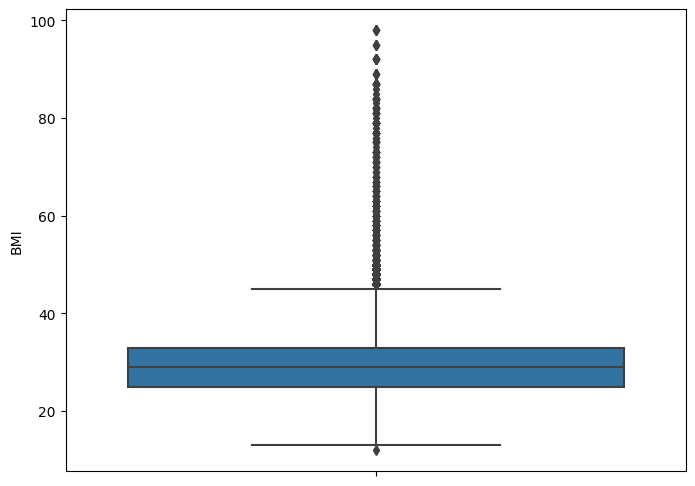

In [22]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
#Box Plot Grafiği Değerleri Çeyreklik Olarak Bölüp Değerlenirdiği İçin Aykırı Değerleri En İyi Gösteren Grafiktir

plt.figure(figsize = (8, 6))
sns.boxplot(data = df1,
            y = df1["BMI"],
            orient = "v");

****

# 5-) Koralasyonları Hesaplama

In [23]:
#Verilerdeki Koralasyonu hesaplayalım

df1.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.377968,0.285877,0.116450,0.291848,0.082745,0.124270,0.209943,-0.155311,-0.050152,-0.076188,-0.096753,0.024177,0.039357,0.402520,0.084415,0.210692,0.270811,0.044916,0.277227,-0.165804,-0.220145
HighBP,0.377968,1.000000,0.312912,0.104354,0.238876,0.082584,0.127617,0.207822,-0.132811,-0.038844,-0.062763,-0.028654,0.036642,0.025227,0.315503,0.060706,0.171944,0.232079,0.040460,0.334641,-0.136371,-0.183094
HighChol,0.285877,0.312912,1.000000,0.088153,0.130210,0.089360,0.098080,0.180668,-0.086663,-0.047137,-0.041454,-0.025142,0.031221,0.031967,0.233867,0.082079,0.140596,0.159922,0.015329,0.238944,-0.081824,-0.103239
CholCheck,0.116450,0.104354,0.088153,1.000000,0.045070,-0.002866,0.022612,0.044277,-0.009061,0.016822,-0.000104,-0.025841,0.109600,-0.063143,0.060622,-0.009684,0.036946,0.045034,-0.007559,0.102607,-0.009690,0.007436
BMI,0.291848,0.238876,0.130210,0.045070,1.000000,0.008954,0.023196,0.059179,-0.169607,-0.081476,-0.052959,-0.058792,-0.011986,0.066156,0.263900,0.101410,0.159786,0.244154,0.000107,-0.041408,-0.096403,-0.120584
Smoker,0.082745,0.082584,0.089360,-0.002866,0.008954,1.000000,0.063447,0.122289,-0.076538,-0.072468,-0.028233,0.078930,-0.011520,0.034520,0.148176,0.089695,0.117421,0.119153,0.112419,0.100842,-0.136719,-0.100158
Stroke,0.124270,0.127617,0.098080,0.022612,0.023196,0.063447,1.000000,0.225375,-0.077928,-0.008314,-0.046481,-0.023227,0.006691,0.038540,0.186441,0.086094,0.163105,0.191366,0.003625,0.123180,-0.071837,-0.133809
HeartDiseaseorAttack,0.209943,0.207822,0.180668,0.044277,0.059179,0.122289,0.225375,1.000000,-0.096380,-0.018470,-0.034397,-0.035419,0.015191,0.034466,0.273904,0.073662,0.196988,0.231687,0.098360,0.222565,-0.094112,-0.144353
PhysActivity,-0.155311,-0.132811,-0.086663,-0.009061,-0.169607,-0.076538,-0.077928,-0.096380,1.000000,0.131908,0.147973,0.017935,0.025279,-0.061033,-0.270146,-0.127172,-0.233482,-0.274516,0.051489,-0.097949,0.185087,0.192604
Fruits,-0.050152,-0.038844,-0.047137,0.016822,-0.081476,-0.072468,-0.008314,-0.018470,0.131908,1.000000,0.236614,-0.033711,0.028132,-0.044994,-0.094316,-0.060163,-0.047506,-0.049545,-0.088306,0.062570,0.095869,0.077423


Text(0.5, 1.0, 'özellik korelasyonu')

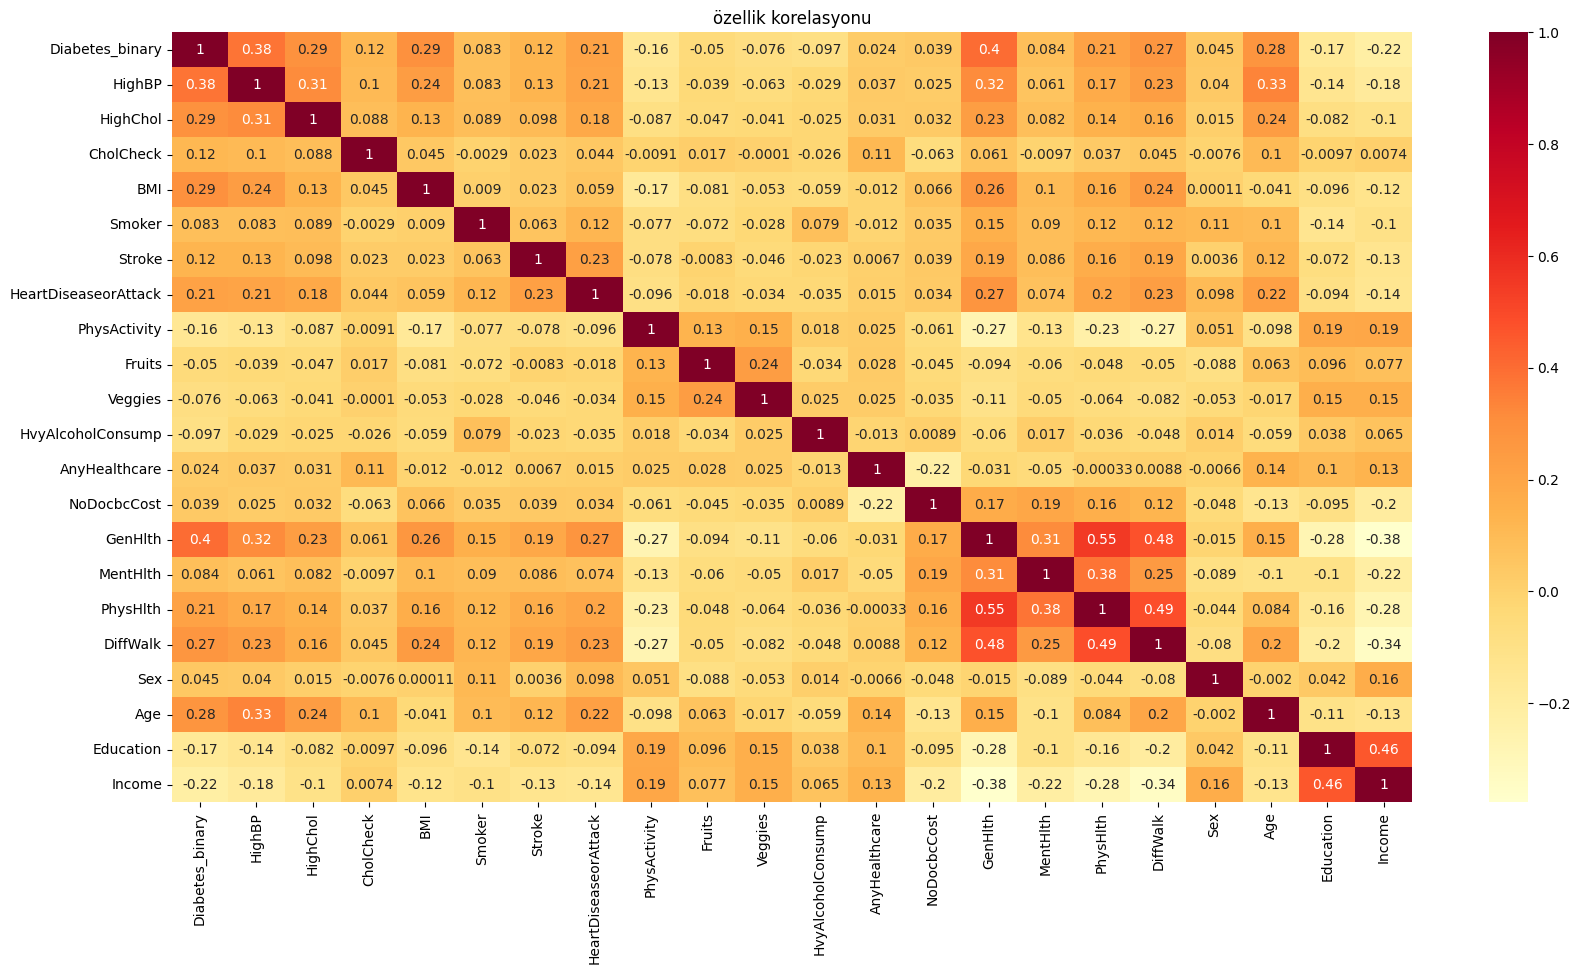

In [24]:
#Koralasyondaki ısı Haritasını çıkaralım

plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot=True , cmap ='YlOrRd' )
plt.title("özellik korelasyonu")

In [25]:
# Koralasyon matrixi oluşturalım
corr_matrix = df1.corr()
# Daha iyi okunabilirlik için koşullu biçimlendirme yapın
cm = sns.light_palette("orange", as_cmap=True)
corr_matrix_style = corr_matrix.style.background_gradient(cmap = cm)
corr_matrix_style

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.377968,0.285877,0.116450,0.291848,0.082745,0.124270,0.209943,-0.155311,-0.050152,-0.076188,-0.096753,0.024177,0.039357,0.402520,0.084415,0.210692,0.270811,0.044916,0.277227,-0.165804,-0.220145
HighBP,0.377968,1.000000,0.312912,0.104354,0.238876,0.082584,0.127617,0.207822,-0.132811,-0.038844,-0.062763,-0.028654,0.036642,0.025227,0.315503,0.060706,0.171944,0.232079,0.040460,0.334641,-0.136371,-0.183094
HighChol,0.285877,0.312912,1.000000,0.088153,0.130210,0.089360,0.098080,0.180668,-0.086663,-0.047137,-0.041454,-0.025142,0.031221,0.031967,0.233867,0.082079,0.140596,0.159922,0.015329,0.238944,-0.081824,-0.103239
CholCheck,0.116450,0.104354,0.088153,1.000000,0.045070,-0.002866,0.022612,0.044277,-0.009061,0.016822,-0.000104,-0.025841,0.109600,-0.063143,0.060622,-0.009684,0.036946,0.045034,-0.007559,0.102607,-0.009690,0.007436
BMI,0.291848,0.238876,0.130210,0.045070,1.000000,0.008954,0.023196,0.059179,-0.169607,-0.081476,-0.052959,-0.058792,-0.011986,0.066156,0.263900,0.101410,0.159786,0.244154,0.000107,-0.041408,-0.096403,-0.120584
Smoker,0.082745,0.082584,0.089360,-0.002866,0.008954,1.000000,0.063447,0.122289,-0.076538,-0.072468,-0.028233,0.078930,-0.011520,0.034520,0.148176,0.089695,0.117421,0.119153,0.112419,0.100842,-0.136719,-0.100158
Stroke,0.124270,0.127617,0.098080,0.022612,0.023196,0.063447,1.000000,0.225375,-0.077928,-0.008314,-0.046481,-0.023227,0.006691,0.038540,0.186441,0.086094,0.163105,0.191366,0.003625,0.123180,-0.071837,-0.133809
HeartDiseaseorAttack,0.209943,0.207822,0.180668,0.044277,0.059179,0.122289,0.225375,1.000000,-0.096380,-0.018470,-0.034397,-0.035419,0.015191,0.034466,0.273904,0.073662,0.196988,0.231687,0.098360,0.222565,-0.094112,-0.144353
PhysActivity,-0.155311,-0.132811,-0.086663,-0.009061,-0.169607,-0.076538,-0.077928,-0.096380,1.000000,0.131908,0.147973,0.017935,0.025279,-0.061033,-0.270146,-0.127172,-0.233482,-0.274516,0.051489,-0.097949,0.185087,0.192604
Fruits,-0.050152,-0.038844,-0.047137,0.016822,-0.081476,-0.072468,-0.008314,-0.018470,0.131908,1.000000,0.236614,-0.033711,0.028132,-0.044994,-0.094316,-0.060163,-0.047506,-0.049545,-0.088306,0.062570,0.095869,0.077423


****

# 6-) Eksik Değer Var Mı Kontrolünun Yapılması

In [26]:
#Burada veri setimizde hiç eksik değer var mı onu sorguluyoruz

df1.isnull().values.any() 

True

In [27]:
#Burada yukarıda aldığımız eksik veri var cevabın da hangi değişkende kaç tane var onu toplayarak buluyoruz

df1.isnull().sum()

Diabetes_binary         2124
HighBP                  2070
HighChol                2171
CholCheck               2128
BMI                     2137
Smoker                  2060
Stroke                  2088
HeartDiseaseorAttack    2030
PhysActivity            2121
Fruits                  2126
Veggies                 2105
HvyAlcoholConsump       2002
AnyHealthcare           2072
NoDocbcCost             2134
GenHlth                 2061
MentHlth                2125
PhysHlth                2047
DiffWalk                1989
Sex                     2059
Age                     2068
Education               2094
Income                  2108
dtype: int64

In [28]:
#Burada toplam kaç tane eksik veri var

df1.isnull().sum().sum()

45919

In [29]:
#Buda eksik olamayan değerleri gösterir

df1.notnull().sum()

Diabetes_binary         67995
HighBP                  68049
HighChol                67948
CholCheck               67991
BMI                     67982
Smoker                  68059
Stroke                  68031
HeartDiseaseorAttack    68089
PhysActivity            67998
Fruits                  67993
Veggies                 68014
HvyAlcoholConsump       68117
AnyHealthcare           68047
NoDocbcCost             67985
GenHlth                 68058
MentHlth                67994
PhysHlth                68072
DiffWalk                68130
Sex                     68060
Age                     68051
Education               68025
Income                  68011
dtype: int64

In [30]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti de toplam {df1.notnull().sum().sum()} adet eksik olmayan, {df1.isnull().sum().sum()} eksik veri var.")

Veri seti de toplam 1496699 adet eksik olmayan, 45919 eksik veri var.


In [31]:
#Burada ise veri setinde hiç eksiği olmayan 5 tane satır getirdi

df[df.notnull().all(axis = 1)][:5]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


****

# 7-) Eksik Veri İle Mücadele

**7.1 Eksik verileri Silerek Mücadele**

In [32]:
#Burada eksik değerleri dropna ile siliyoruz ve bunu temiz bir değişkene atıyoruz

df1_clear = df1.dropna(inplace = False)

**7.2 Eksik verilerin doldurulması**

In [33]:
#Doldurma işlemin gerçekleştiriken kendi orjinal data setin değişmemesi için temiz bir değişkene atıyorum
df_dolu = df1.copy()

df_dolu.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [34]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_Diabetes_binary = df_dolu['Diabetes_binary'].mean()

df_dolu['Diabetes_binary'].fillna(value = mean_Diabetes_binary, inplace = True)

df_dolu.isna().sum()

#Görüldüğü gibi Diabetes_binary eksik veri 0 oldu

/tmp/ipykernel_31/805041950.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dolu['Diabetes_binary'].fillna(value = mean_Diabetes_binary, inplace = True)


Diabetes_binary            0
HighBP                  2070
HighChol                2171
CholCheck               2128
BMI                     2137
Smoker                  2060
Stroke                  2088
HeartDiseaseorAttack    2030
PhysActivity            2121
Fruits                  2126
Veggies                 2105
HvyAlcoholConsump       2002
AnyHealthcare           2072
NoDocbcCost             2134
GenHlth                 2061
MentHlth                2125
PhysHlth                2047
DiffWalk                1989
Sex                     2059
Age                     2068
Education               2094
Income                  2108
dtype: int64

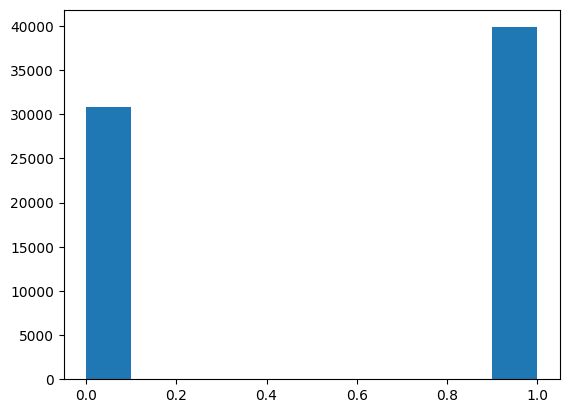

In [35]:
#Veri setin nasıl dolduracağımızı dağılımını göstermek için

plt.hist(df['HighBP'])
plt.show()

**VERİ SETİMDE KATAGORİK VERİ TİPİ OLMADIĞI İÇİN O KISMI GEÇİYORUM**

**Ben Kodumda Bundan Sonraki İşlemlerde df1_clear değişkenini Kullanıcam Bu Değişkeni Veri Setimizdeki Eksik Gözlemleri Silerek Oluşturduk (YUKARIDA)**

****

# 8-) Diyabet Hastalığının Değişkenlere Göre Analizi

In [36]:
#Diyabet Olanların sayısı
#NOT : DİYABET HASTASI OLAN KİŞİLER 1 || DİYABET HASTASI OLMAYAN KİŞİLERİN DEĞERİ 0 DIR

df1_clear["Diabetes_binary"].value_counts()

Diabetes_binary
1.0    18138
0.0    17809
Name: count, dtype: int64

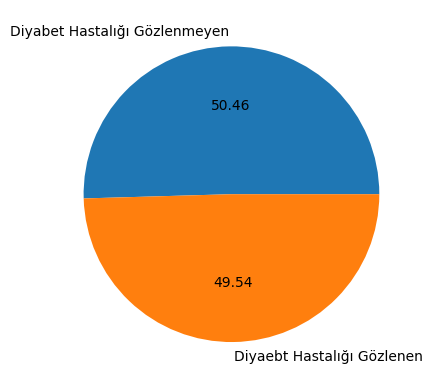

In [37]:
#Diyabet hastası olan ve olmayan kşilerin pasta grafiği

labels=["Diyabet Hastalığı Gözlenmeyen","Diyaebt Hastalığı Gözlenen"]

plt.pie(df1_clear["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

****

**SOSYAL ETKİLERİN (CİNSİYET, EĞİTİM, GELİR VE YAŞIN) DİYABETE ETKİSİ**

**1-) CİNSİYETLE DİYABETİN İLİŞKİSİ**

In [38]:
#Cinsiyetin dağılımın diyabete etkisi (TABLO HALİNDE)

pd.crosstab(df1_clear.Sex,df1_clear.Diabetes_binary)

Diabetes_binary,0.0,1.0
Sex,,
0.0,10029,9454
1.0,7780,8684


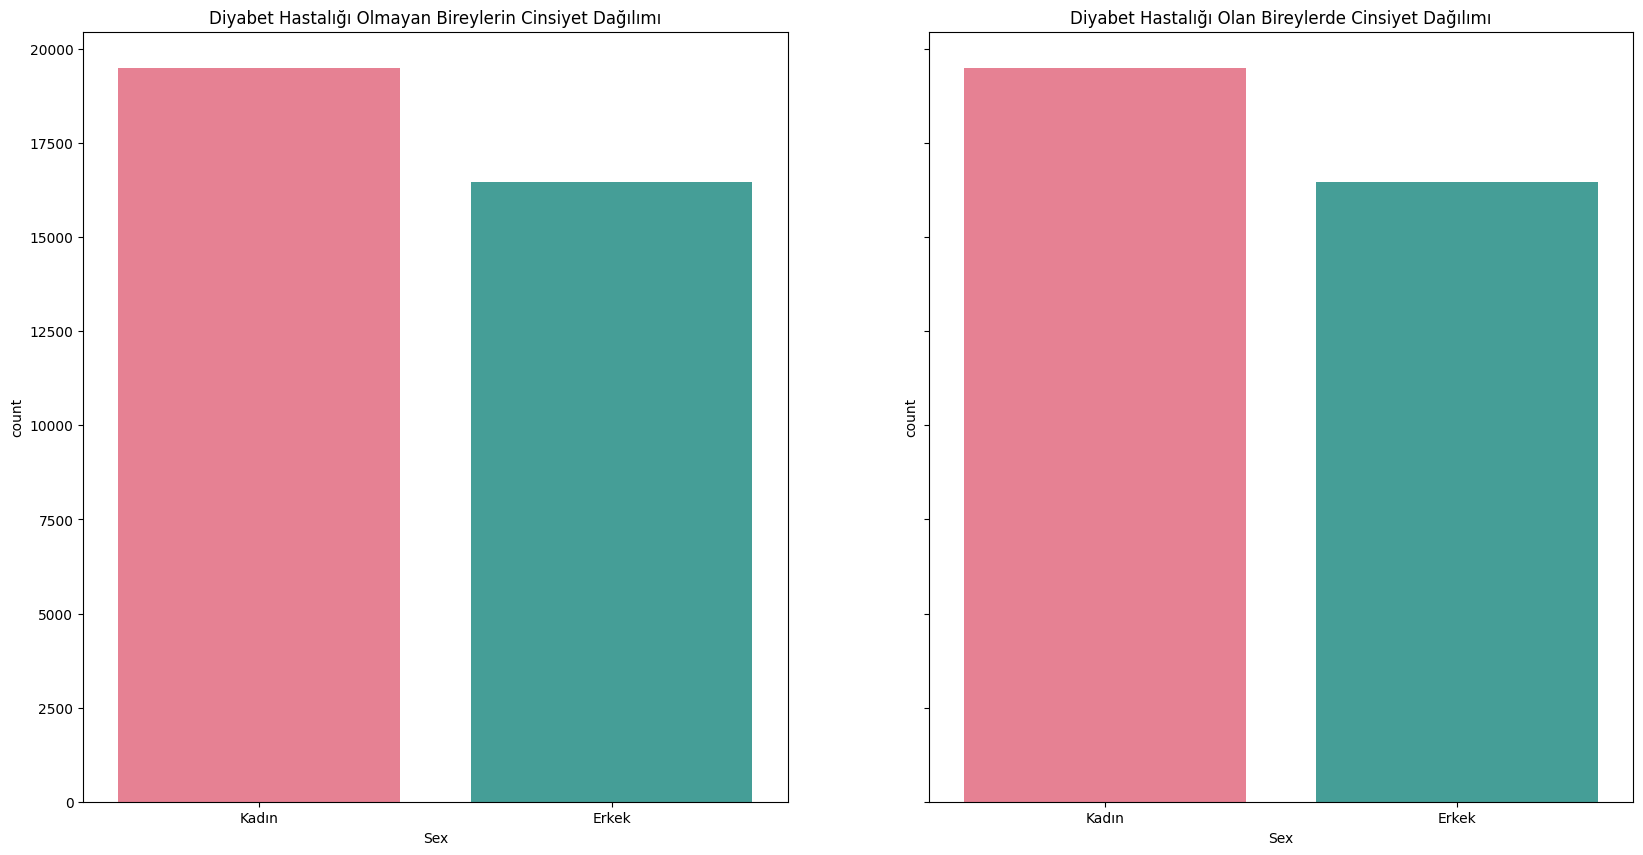

In [39]:
#Cinsiyet dağılımın diyabete etkisi (GRAFİK HALİNDE)

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))
ax1 = sns.countplot(data=df1_clear, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Diyabet Hastalığı Olmayan Bireylerin Cinsiyet Dağılımı')
ax1.set_xticklabels(['Kadın', 'Erkek'])

ax2 = sns.countplot(data=df1_clear, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Diyabet Hastalığı Olan Bireylerde Cinsiyet Dağılımı')
ax2.set_xticklabels(['Kadın', 'Erkek'])
plt.show()

**2-YAŞIN DİYABET İLE İLİŞKİSİ**

In [40]:
#Yaşın diyabete etkisi

pd.crosstab(df1.Age,df1_clear.Diabetes_binary)

Diabetes_binary,0.0,1.0
Age,,
1.0,470,41
2.0,656,84
3.0,869,167
4.0,1065,314
5.0,1210,555
6.0,1437,933
7.0,1915,1565
8.0,2211,2180
9.0,2208,2903


[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

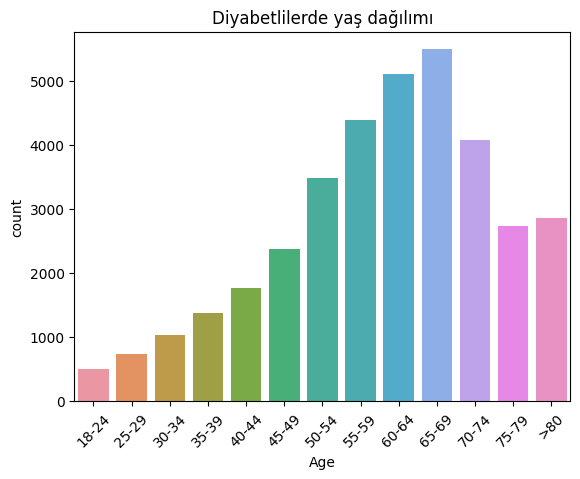

In [41]:
ax = sns.countplot(data=df1_clear, x='Age')
ax.set(title= 'Diyabetlilerde yaş dağılımı')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

**3-) VÜCUT KİTLE ENDEKSİNİN DİYABET(BIM) İLE İLİŞKİSİ**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(15.0, 60.0)

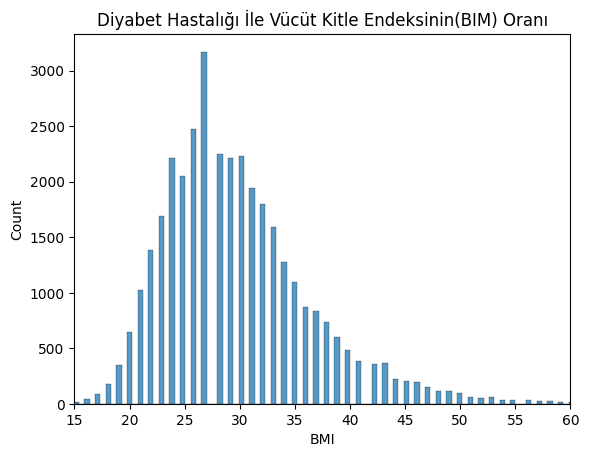

In [42]:
sns.histplot(data=df1_clear, x='BMI').set(title='Diyabet Hastalığı İle Vücüt Kitle Endeksinin(BIM) Oranı')
plt.xlim(15, 60)

#Daha iyi bir ölçüm için 15 in altı 60 ın üstü değerleri kaldıralım

(15.0, 60.0)

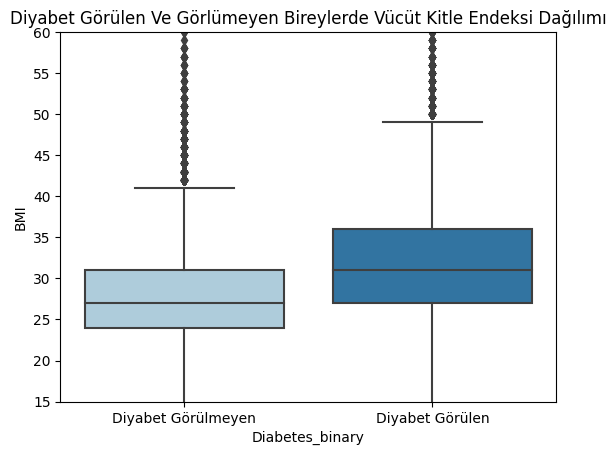

In [43]:
#Aykırı Değerleri Daha Rahat Görmemiz İçin Box Plot Grafiğinde Gösterelim

ax = sns.boxplot(data=df1_clear, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'Diyabet Görülen Ve Görlümeyen Bireylerde Vücüt Kitle Endeksi Dağılımı')
ax.set_xticklabels(['Diyabet Görülmeyen', 'Diyabet Görülen'])
plt.ylim(15, 60)

**4-) Yüksek Kolesterol, Yüksek Tansiyon, Sigara, Alkol Tüketimi, Fiziksel Aktivitein Diyabete Etkisi**

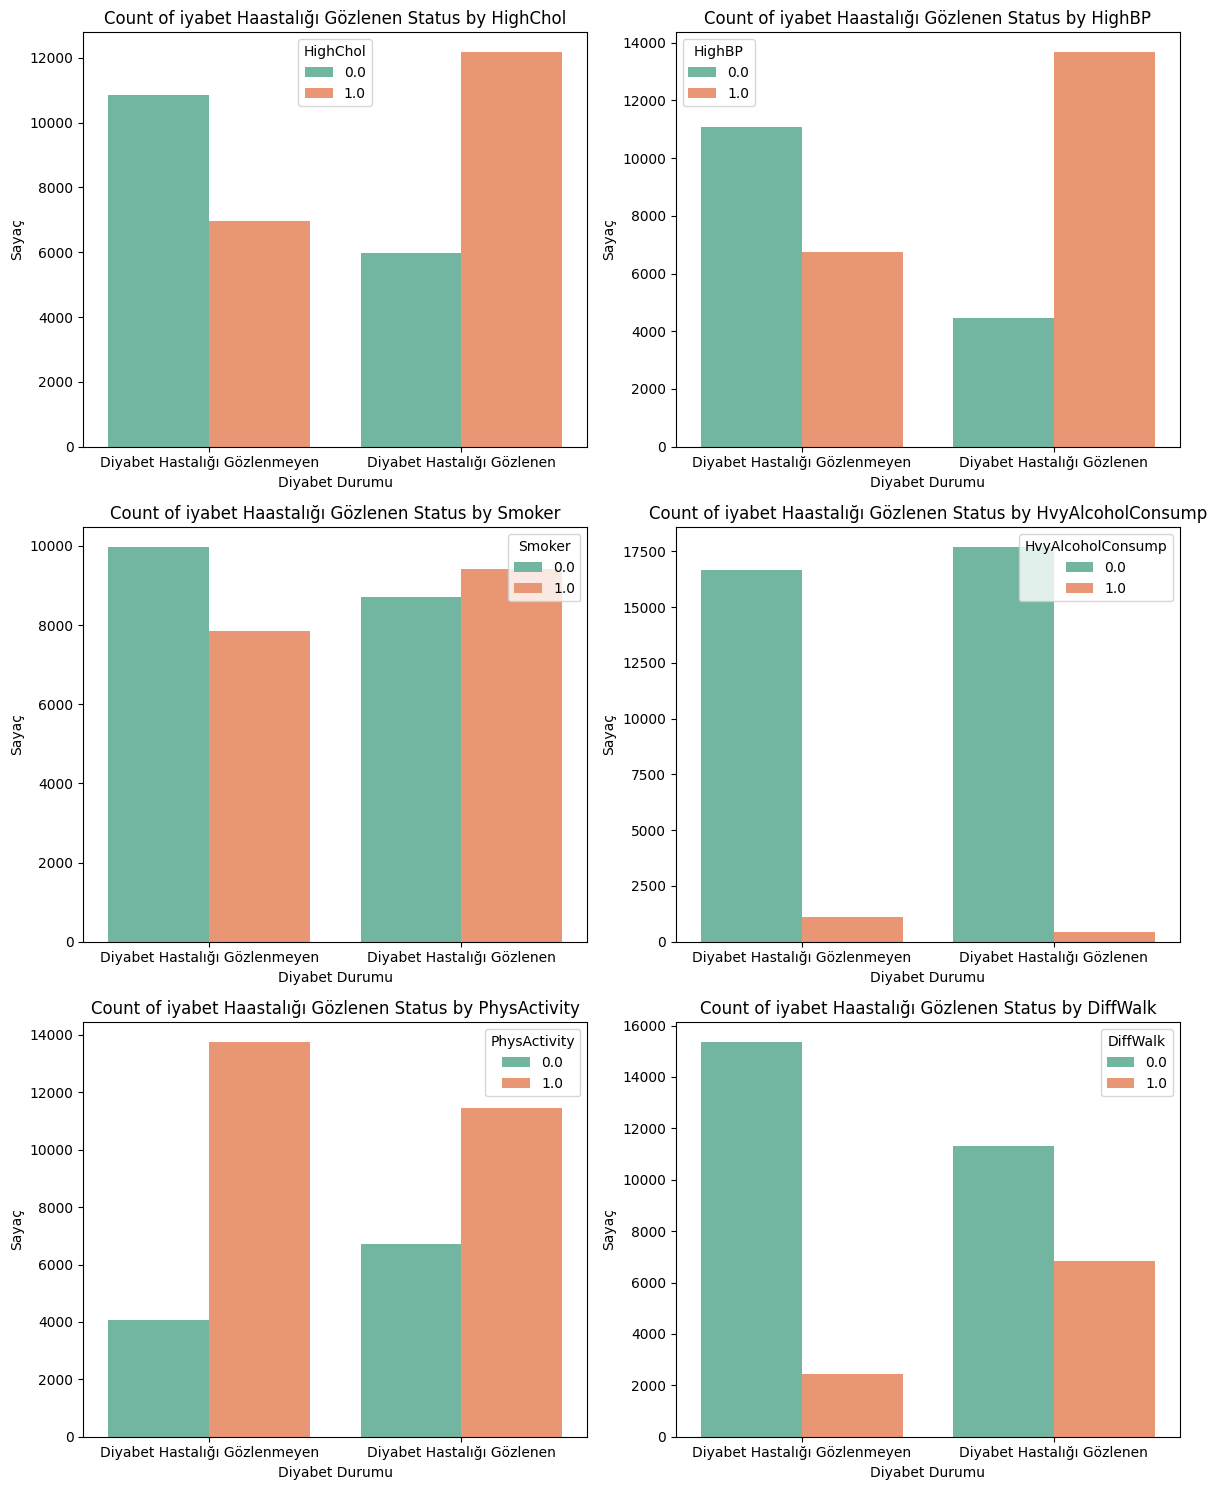

In [44]:
# Diyabetsiz ve diyabetliler arasındaki verileri görsel olarak karşılaştırabileceğimiz bazı ikili sütunlar var
# Sütünlar Tek Seferde Grafiğe Dökelim.
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3  # Satrı Sayısı
b = 2  # Kolon Sayısı
c = 1  # Sayıcı

fig = plt.figure(figsize=(12, 15))
for col in col_names: #Burada for döngüsü kullanarak yukarıdaki Değişkenleri tek tek dönerek grafiklerini çizdiriyor
    plt.subplot(a, b, c)
    ax = sns.countplot(data=df1_clear, x='Diabetes_binary', hue=col, palette='Set2')
    ax.set(title=f'Count of iyabet Haastalığı Gözlenen Status by {col}', xlabel='Diyabet Durumu', ylabel='Sayaç')
    ax.set_xticklabels(['Diyabet Hastalığı Gözlenmeyen', 'Diyabet Hastalığı Gözlenen'])
    ax.legend(title=col)
    c += 1  
plt.tight_layout()
plt.show()

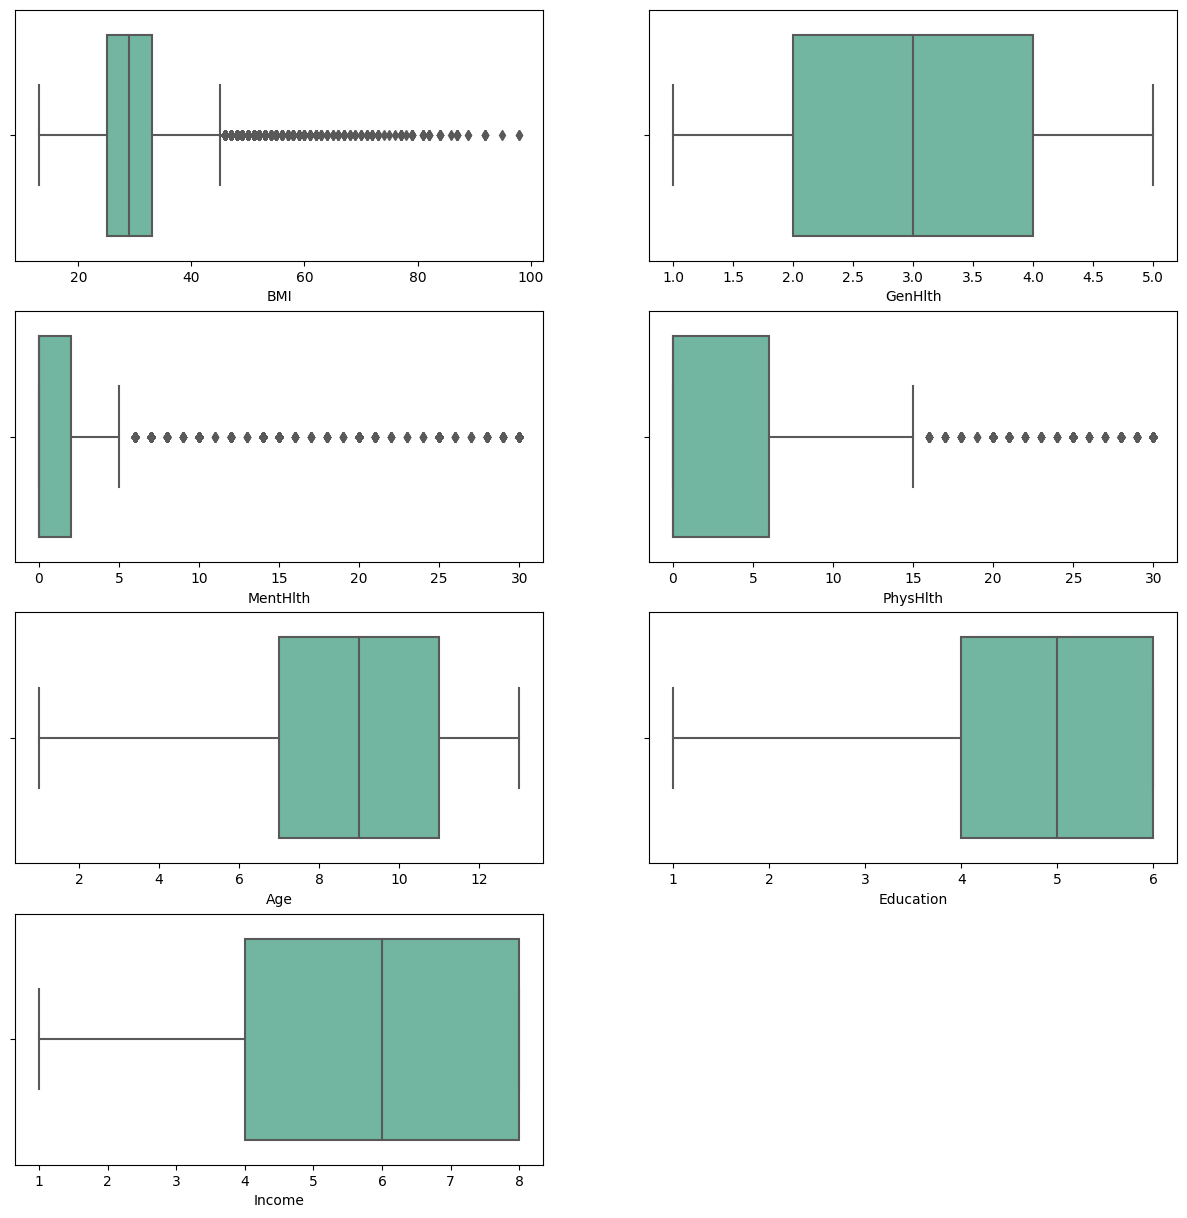

In [45]:
#Bazı Verileri Kullanarak Box Plot Grafiği Kullanarak Aykırı Değerleri Gözlemleyelim

plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df1_clear ,palette='Set2')
plt.show()

**5-) Yüksek kolsetrolün diyabet gözlenen ve gözlenmeyen bireylerde fark var mı**

In [46]:
olasılık= pd.crosstab(df1_clear.Diabetes_binary, df1_clear.HighChol)
olasılık

HighChol,0.0,1.0
Diabetes_binary,,
0.0,10858,6951
1.0,5965,12173


Text(0.5, 1.0, 'Diyabet Gözlenmeyen Bireyler Ve Gözelnen Bireylerde Yüksk Koresterol Oranı')

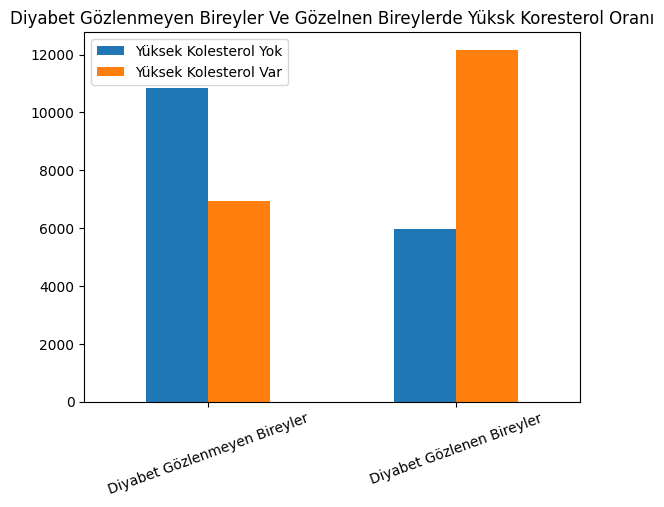

In [47]:
#Yüksek kolesterolun görselleştirilmesi

ax = olasılık.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['Diyabet Gözlenmeyen Bireyler', 'Diyabet Gözlenen Bireyler'], rotation=20)
ax.legend(['Yüksek Kolesterol Yok', 'Yüksek Kolesterol Var'])
plt.title('Diyabet Gözlenmeyen Bireyler Ve Gözelnen Bireylerde Yüksk Koresterol Oranı')

# 9-) Ki Kare Testi İle (Yüksek Kolesterolun Diyabet İlişkisi Vardır) Hipotezini Test Etme

Ki-kare testi veya χ² testi istatistik bilimi içinde bir sıra değişik problemlerde kullanılan bazıları parametrik olmayan sınama ve diğerleri parametrik sınama yöntemidir.Bu çeşit istatistiksel sınamalarda test istatistiği için "örnekleme dağılımı", sıfır hipotez gerçek olursa ki-kare dağılımı gösterir veya sıfır hipotez "asimptotik olarak gerçek" olursa, eğer sıfır hipotez gerçekse ve eğer örnekleme hacmi istenilen kadar yeterli olarak büyük ise bir ki-kare dağılımına çok yakın olarak yaklaşım gösterir.

Burada bootcamp kapsamında model kurmayacağımız için iki veri arasındaki ilşikiyi matematiksel olarak kanıtladım 

 [Kaynak ](https://tr.wikipedia.org/wiki/Ki-kare_testi)

In [48]:
#İki Veri Arasında İlişki Aradığımız için Ki-Kare Testi Yapalım

chi2, p_value_3, dof, exp_freq = chi2_contingency(olasılık)
if (p_value_3 < 0.05):
    print('Yüksek Kolesterolun Diyabet İle İlişkisi Vardır')
else:
    print('Yüksek Kolesterolun Diyabet İle İlişkis Yoktur')

Yüksek Kolesterolun Diyabet İle İlişkisi Vardır


Proje ucu açık projedir. Kan değerleri ile diyabet tesbiti için bir yapay zeka model kurulabilir. Yada diyabet ilaçları fiyatlandırmaları veri seti elde edilebilirse hastalığın durumuna göre sende kaç adet ve bu kadar ilacın ne kadar tuacağını hesaplayabilecek modeller kurulabilir.Bu veriler elde edildiğinde ve gerekli şekilde modeller kullanıldığında diyabet hasatlığın teşis aşamasından her aşamasına kadar insan hayatını kolaylaştırabilir 